In [1]:
"""
This notebook can be used to perform a bell test and calculate the S value using all 4 output ports 
"""
import sys
sys.path.insert(0, '../')

import numpy as np
from src.time_tagger import TimeTaggerController, TT_Simulator, two_particle_states
from src.kinetic_mount_controller import KineticMountControl
import matplotlib.pyplot as plt

# Setup SPCMs

In [2]:
# Init the Time Tagger and the Kinetic Mount Controller
TTC = TimeTaggerController()

# NOTE Look at the trace, sucessively block each port and assign the channels numbers in the next cell
# NOTE afterwards stop and close the graphic
#TTC.displayCountTraces()

In [3]:
# set alice channels
TTC.set_alice_reflection_channel(3)
TTC.set_alice_transmission_channel(2)

# set bob channels
TTC.set_bob_reflection_channel(4)
TTC.set_bob_transmission_channel(1)

# NOTE Verify that each trace is correctly labelled and then stop and close the graphic again
TTC.displayCountTraces()

Output()

In [4]:
TTC.displayCoincidenceTraces()

Output()

# Setup Kinetic Mounts

In [5]:
# only run if not already created
if 'KMC' not in globals():  
    KMC = KineticMountControl(number_of_devices=3)


ASSIGNING CONTROLLERS
---------------------------------------------------------------
Ports Found: ['COM8', 'COM9', 'COM14']
---------------------------------------------------------------
Device succesfully connected (Rotation Mount)
Device succesfully connected (Dual-Position Slider)
Device succesfully connected (Rotation Mount)


In [6]:
# set bob home offset
KMC.bob.set_home_offset(-43 % 360)
KMC.bob.home()
# set alice home offset
KMC.alice.set_home_offset(6)
KMC.alice.home()
# make sure shutter is open
KMC.shutter.open()

2

# Setup Simulator

In [7]:
TTSimulator = TT_Simulator(two_particle_states['phi_plus'], initial_state_noise=0, debug=True)
# convert from light angle to filter angle and from radians to degrees
CHSH_angles = TTSimulator.CHSH_angles_for_filters
print(f"CHSH_angles: {CHSH_angles}")


TIME-TAGGER SIMULATOR
---------------------------------------------------------------
Initialising . . .

For the initial state:
Matrix([[sqrt(2)/2], [0], [0], [sqrt(2)/2]])

The correlation function has the form:
cos(2*theta_a - 2*theta_b)

We find the following optimal CHSH angles (in multiples of pi):
a0:	0.0000, a1:	-0.2500
b0:	-0.1250, b1:	0.1250

And measurements taken at this angle will produce as CHSH value S of
S = 2.8284 ( 100% of S_bell )

---------------------------------------------------------------
CHSH_angles: [  0.         -22.49882581 -11.24825903  11.25018533]


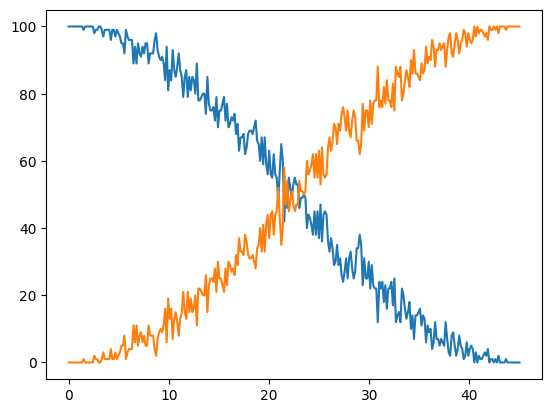

In [8]:
angles = np.linspace(0, 45, 300)
LSame = []
LMixed = []
for a in angles:
    data = TTSimulator.measure_n_entangled_pairs_filter_angles(100, theta_a=a, theta_b=0)
    LSame.append(data[0] + data[3])
    LMixed.append(data[1] + data[2])

plt.plot(angles, LSame) 
plt.plot(angles, LMixed)

In [10]:
# angles are given as [a, A, b, B]
maxContrastAngles = [0, 45, 0, 45]
idealAngles = [0, -22.5, -11.25, 11.25] # for triplett |HH> + |VV> initial state
TTC.measureS(KMC, CHSH_angles=idealAngles, integration_time_per_basis_setting_SI=3, TTSimulator=TTSimulator)


corr[a,b] = 0.716
	N[|T,T>]=2219
	N[|T,R>]=362
	N[|R,T>]=348
	N[|R,R>]=2071

corr[a,B] = 0.7092
	N[|T,T>]=2143
	N[|T,R>]=355
	N[|R,T>]=372
	N[|R,R>]=2130

corr[A,b] = 0.7048
	N[|T,T>]=2152
	N[|T,R>]=360
	N[|R,T>]=378
	N[|R,R>]=2110

corr[A,B] = -0.6988
	N[|T,T>]=375
	N[|T,R>]=2098
	N[|R,T>]=2149
	N[|R,R>]=378

S = abs(corrs[0,0] + corrs[0,1] + corrs[1,0] - corrs[1,1]) = 2.8287999999999998


In [14]:
TTC.measure_S_with_two_ports(ports="all_ports", KMC=KMC, CHSH_angles=[0, -22.5, -11.25, 11.25], integration_time_per_basis_setting_SI=3, TTSimulator=None)

SPCM Pair: TT

corr[a,b] = 0.4959319526627219
	N[|T,T>]=2277
	N[|T,R>]=705
	N[|R,T>]=658
	N[|R,R>]=1768
------------------------------
SPCM Pair: TR

corr[a,b] = -0.465246067985794
	N[|T,T>]=269
	N[|T,R>]=781
	N[|R,T>]=663
	N[|R,R>]=258
------------------------------
SPCM Pair: RT

corr[a,b] = -0.39209726443769
	N[|T,T>]=324
	N[|T,R>]=788
	N[|R,T>]=586
	N[|R,R>]=276
------------------------------
SPCM Pair: RR

corr[a,b] = 0.37372654155495977
	N[|T,T>]=759
	N[|T,R>]=337
	N[|R,T>]=247
	N[|R,R>]=522
------------------------------
SPCM Pair: TT

corr[a,B] = 0.6775517820488898
	N[|T,T>]=2453
	N[|T,R>]=462
	N[|R,T>]=402
	N[|R,R>]=2042
------------------------------
SPCM Pair: TR

corr[a,B] = -0.6494644595910418
	N[|T,T>]=189
	N[|T,R>]=863
	N[|R,T>]=831
	N[|R,R>]=171
------------------------------
SPCM Pair: RT

corr[a,B] = -0.658611825192802
	N[|T,T>]=193
	N[|T,R>]=925
	N[|R,T>]=688
	N[|R,R>]=139
------------------------------
SPCM Pair: RR

corr[a,B] = 0.715891670924885
	N[|T,T>]=945
	N[|T